In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import math
import scipy.stats as ss
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
df = pd.read_csv("/kaggle/input/phishing-dataset-for-machine-learning/Phishing_Legitimate_full.csv")
df

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [4]:
target = df['CLASS_LABEL']

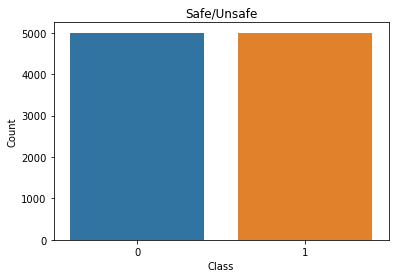

In [5]:
count = df['CLASS_LABEL'].value_counts()
x = count.index
y = count.values
sns.barplot(x=x, y=y)
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Safe/Unsafe')
plt.show()

In [6]:
categorical_features = ['AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths',
                        'HttpsInHostname','DoubleSlashInPath','EmbeddedBrandName','ExtFavicon','InsecureForms','RelativeFormAction',
                        'ExtFormAction','AbnormalFormAction','FrequentDomainNameMismatch','FakeLinkInStatusBar','RightClickDisabled',
                        'PopUpWindow','SubmitInfoToEmail','IframeOrFrame','MissingTitle','ImagesOnlyInForm','SubdomainLevelRT',
                        'UrlLengthRT','PctExtResourceUrlsRT','AbnormalExtFormActionR','ExtMetaScriptLinkRT','PctExtNullSelfRedirectHyperlinksRT']

numerical_features = [x for x in df.columns if x not in categorical_features]

In [7]:
print(len(categorical_features), len(numerical_features))

29 21


## Categorical Data

In [8]:
categorical_data = df[categorical_features]

for feature in categorical_data.columns:
    categorical_data[feature] = categorical_data[feature].astype('category')
    
categorical_data.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,AtSymbol,TildeSymbol,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,EmbeddedBrandName,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,2,2,2,2,2,2,1,2,2,...,2,2,2,2,3,3,3,3,3,3
top,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,1
freq,9997,9869,9888,5252,9828,9778,5711,10000,9991,9429,...,8712,6604,9678,9696,9666,3465,6341,8469,3988,6094


In [9]:
def conditional_entropy(x,y):
    
    y_counter  = Counter(y) # count of all possible y's (the different values that the feature can take and their frequency)
    xy_counter = Counter(list(zip(x,y))) # count of all possible pairs of x and y
    
    total_occurences = sum(y_counter.values())
    entropy = 0.0
    
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy]/total_occurences
        p_y  = y_counter[xy[1]]/total_occurences
        entropy += p_xy*math.log(p_y/p_xy,math.e)
    
    return entropy

In [10]:
def theils_u(x,y):
    
    h_xy = conditional_entropy(x,y) 
    x_counter = Counter(x) 
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values())) 
    h_x = ss.entropy(p_x)
    if h_x == 0:
        return 1
    else:
        return (h_x - h_xy) / h_x

In [11]:
uc_scores = dict()
categorical_data = df[categorical_features]

for feature in categorical_features:
    y  = categorical_data[feature]
    uc = theils_u(target,y)
    uc_scores[feature] = uc
    
# sort the scores in descending order
uc_scores = sorted(uc_scores.items(),key=lambda kv: (kv[1],kv[0]),reverse=True)
for k,v in uc_scores:
    print("{} : {}".format(k,v))

PctExtNullSelfRedirectHyperlinksRT : 0.30640684532617585
FrequentDomainNameMismatch : 0.18104492423293908
ExtMetaScriptLinkRT : 0.16957923020651786
SubmitInfoToEmail : 0.1125679667056817
InsecureForms : 0.07946502625455433
PctExtResourceUrlsRT : 0.040843553824205354
IframeOrFrame : 0.04047475571797762
AbnormalExtFormActionR : 0.026208142124493995
UrlLengthRT : 0.021840281668367986
IpAddress : 0.0174171493137134
AbnormalFormAction : 0.016142805575150146
EmbeddedBrandName : 0.015382133840065811
MissingTitle : 0.010609090692902206
DomainInPaths : 0.010103889912071663
ExtFormAction : 0.008099211801888878
DomainInSubdomains : 0.007931099697501191
TildeSymbol : 0.007737063288187011
SubdomainLevelRT : 0.0064973854391998515
RandomString : 0.005256076816576079
RelativeFormAction : 0.0049335643680913305
RightClickDisabled : 0.004362782255926228
PopUpWindow : 0.004211754857410474
NoHttps : 0.0041187624630195365
ExtFavicon : 0.0034599137633324387
DoubleSlashInPath : 0.0004474212774166851
AtSymbol 

Highly correlated categorical features are - 
* PctExtNullSelfRedirectHyperlinksRT
* FrequentDomainNameMismatch
* ExtMetaScriptLinkRT
* SubmitInfoToEmail

In [12]:
filtered_cat = ['PctExtNullSelfRedirectHyperlinksRT','FrequentDomainNameMismatch','ExtMetaScriptLinkRT', 'SubmitInfoToEmail']
filtered_cat_data = categorical_data[filtered_cat]


for feature in filtered_cat_data.columns:
    filtered_cat_data[feature] = filtered_cat_data[feature].astype('int32')     

filtered_cat_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PctExtNullSelfRedirectHyperlinksRT,FrequentDomainNameMismatch,ExtMetaScriptLinkRT,SubmitInfoToEmail
0,1,0,-1,0
1,1,0,1,0
2,0,0,-1,0
3,-1,1,1,1
4,-1,1,-1,0


## Numerical Data

In [13]:
numerical_data = df[numerical_features]
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.0,2500.750000,5000.500000,7500.250000,10000.0
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0
NumPercent,10000.0,0.073800,0.622248,0.0,0.000000,0.000000,0.000000,19.0
NumQueryComponents,10000.0,0.458600,1.344793,0.0,0.000000,0.000000,0.000000,23.0


In [14]:
target = df['CLASS_LABEL']

In [15]:
rpb_scores = dict()

for feature in numerical_features:
    y = numerical_data[feature]
    rpb = abs(ss.pointbiserialr(y,target).correlation)
    rpb_scores[feature] = rpb
    
rpb_scores = sorted(rpb_scores.items(),key=lambda kv: (kv[1],kv[0]),reverse=True)
for k,v in rpb_scores:
    print("{} : {}".format(k,v))

CLASS_LABEL : 1.0
id : 0.8660254081145657
NumDash : 0.37223491648822243
PctNullSelfRedirectHyperlinks : 0.34280619253503297
NumDots : 0.2941113745741385
PctExtHyperlinks : 0.25972792319002624
NumSensitiveWords : 0.25520807467651013
PathLevel : 0.22945038959688044
HostnameLength : 0.1691568937417125
NumDashInHostname : 0.15044434207453125
NumQueryComponents : 0.14739070133291554
NumUnderscore : 0.09886920740580152
NumAmpersand : 0.08144631548410983
QueryLength : 0.0805245582508595
PathLength : 0.07612474993254581
UrlLength : 0.07449306083766773
NumPercent : 0.06846489880098748
NumHash : 0.04801356261566736
SubdomainLevel : 0.043132354036452145
PctExtResourceUrls : 0.021922159435337943
NumNumericChars : 0.01912159923106215


Ignoring Class_Label and ID. Highly correlated numerical features are -
* NumDash
* PctNullSelfRedirectHyperlinks
* NumDots
* PctExtHyperlinks
* NumSensitiveWords
* PathLevel
* HostnameLength
* NumDashInHostname
* NumQueryComponents

In [16]:
filtered_nums = ['NumDash', 'PctNullSelfRedirectHyperlinks', 'NumDots', 'PctExtHyperlinks', 'NumSensitiveWords', 'PathLevel', 'HostnameLength', 'NumDashInHostname', 'NumQueryComponents']
filtered_num_data = df[filtered_nums]

In [17]:
filtered_data = pd.concat([filtered_num_data,filtered_cat_data],axis=1)
filtered_data['target'] = target

In [18]:
filtered_data.head()

,NumDash,PctNullSelfRedirectHyperlinks,NumDots,PctExtHyperlinks,NumSensitiveWords,PathLevel,HostnameLength,NumDashInHostname,NumQueryComponents,PctExtNullSelfRedirectHyperlinksRT,FrequentDomainNameMismatch,ExtMetaScriptLinkRT,SubmitInfoToEmail,target
0,0,0.0,3,0.000,0,5,21,0,0,1,0,-1,0,1
1,0,0.0,3,0.000,1,3,17,0,2,1,0,1,0,1
2,0,0.0,3,0.375,0,2,27,0,0,0,0,-1,0,1
3,1,0.0,3,1.000,0,6,22,0,0,-1,1,1,1,1
4,0,0.0,3,1.000,0,4,10,0,0,-1,1,-1,0,1


In [19]:
train, test = train_test_split(filtered_data, test_size=0.1)
train, val = train_test_split(train, test_size=0.2)

In [20]:
print(train.shape, test.shape, val.shape)

(7200, 14) (1000, 14) (1800, 14)


In [21]:
def dataframe_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    target = df.pop('target') 
    ds = tf.data.Dataset.from_tensor_slices((dict(df),target))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

In [22]:
batch_size = 128
train_ds = dataframe_to_dataset(train, batch_size=batch_size)
val_ds = dataframe_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = dataframe_to_dataset(test, shuffle=False, batch_size=batch_size)

2023-02-09 16:16:22.400476: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
def get_normalization_layer(feature,dataset):
    normalizer = preprocessing.Normalization(axis=None)
    feature_ds = dataset.map(lambda x, y: x[feature])
    normalizer.adapt(feature_ds)
    return normalizer

def get_encoding_layer(feature,dataset,dtype,max_tokens):
    index = preprocessing.IntegerLookup(max_values=max_tokens,oov_value=-2)
    feature_ds = dataset.map(lambda x,y : x[feature])
    index.adapt(feature_ds)
    encoder = preprocessing.CategoryEncoding(max_tokens = len(index.get_vocabulary()))
    
    return lambda feature : encoder(index(feature))

In [24]:
all_inputs = list()
encoded_features = list()

for header in filtered_nums:
    numeric_col = tf.keras.Input(shape=(1,), name=header)
    normalization_layer = get_normalization_layer(header, train_ds)
    normalized_numeric_col = normalization_layer(numeric_col)
    all_inputs.append(numeric_col)
    encoded_features.append(normalized_numeric_col)
    
for header in filtered_cat:
    categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='int32')
    encoding_layer = get_encoding_layer(header, train_ds, dtype='int32',max_tokens=5)
    encoded_categorical_col = encoding_layer(categorical_col)
    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)

2023-02-09 16:16:22.691876: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [25]:
all_features = tf.keras.layers.concatenate(encoded_features)

x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [26]:
epochs = 500

In [27]:
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/500
57/57 [==============================] - 2s 13ms/step - loss: 0.6805 - accuracy: 0.5933 - val_loss: 0.4860 - val_accuracy: 0.6822
Epoch 2/500
57/57 [==============================] - 0s 4ms/step - loss: 0.4644 - accuracy: 0.7226 - val_loss: 0.3680 - val_accuracy: 0.8033
Epoch 3/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3621 - accuracy: 0.8017 - val_loss: 0.3111 - val_accuracy: 0.8333
Epoch 4/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3177 - accuracy: 0.8400 - val_loss: 0.2819 - val_accuracy: 0.8583
Epoch 5/500
57/57 [==============================] - 0s 4ms/step - loss: 0.2969 - accuracy: 0.8579 - val_loss: 0.2659 - val_accuracy: 0.8739
Epoch 6/500
57/57 [==============================] - 0s 4ms/step - loss: 0.2749 - accuracy: 0.8744 - val_loss: 0.2554 - val_accuracy: 0.8900
Epoch 7/500
57/57 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.8831 - val_loss: 0.2486 - val_accuracy: 0.8906
Epoch 8/500


In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

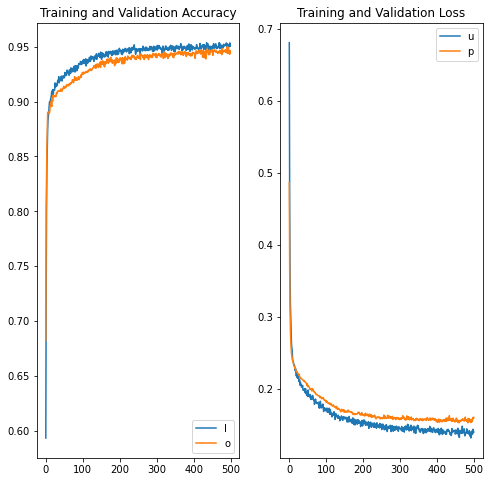

In [29]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label = 'Training Accuracy')
plt.plot(range(epochs), val_acc, label = 'Validation Accuracy')
plt.legend('lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label = 'Training Loss')
plt.plot(range(epochs), val_loss, label = 'Validation Loss')
plt.legend('upper right')
plt.title('Training and Validation Loss')

In [30]:
y_test = test['target']
y_pred = model.predict(test_ds)
classes = []
for pred in y_pred:
    if pred > 0:
        classes.append(1)
    else:
        classes.append(0)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [32]:
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       488
           1       0.98      0.95      0.97       512

    accuracy                           0.96      1000
   macro avg       0.97      0.97      0.96      1000
weighted avg       0.97      0.96      0.97      1000



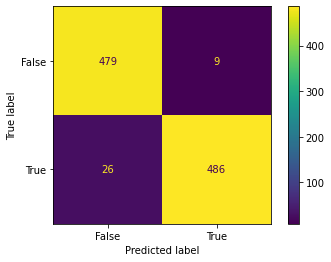

In [33]:
confusion_matrix = confusion_matrix(y_test, classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [34]:
model.save('/kaggle/working/Model')

2023-02-09 16:19:35.018766: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
